In [1]:
cd /home

/home


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import joblib
import umap
import os 

from sklearn.metrics.pairwise import cosine_similarity

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

%load_ext autoreload
%autoreload 2

2023-12-04 14:46:19.718875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
path = './presentation/experiments/astromer_1/results/astromer_1_clean/2023-10-24_13-37-08/'
# path = './presentation/experiments/astromer_1/results/astromer_1_clean/2023-10-24_13-37-08/'

In [4]:
model_folder = path.split('/')[-2]

dataset ='alcock'
fold_n = 0
fold = 'fold_{}'.format(fold_n)
spc = 20
subdataset = '{}_{}'.format(dataset, spc)
embpath = os.path.join('./data/embeddings/', model_folder, dataset, fold, subdataset)
embpath

'./data/embeddings/2023-10-24_13-37-08/alcock/fold_0/alcock_20'

In [5]:
with open(os.path.join(embpath, 'test.joblib'), 'rb') as handle:
    emb_dict = joblib.load(handle)

In [6]:
%%time
# avg_att = np.array([emb_dict['embedding'][i][1:int(s), :].mean(axis=0) \
#            for i, s in enumerate(np.sum(emb_dict['mask'], 1)[:, 0])])
avg_att = emb_dict['embedding'][:, 0, :]
avg_att.shape

CPU times: user 9 µs, sys: 11 µs, total: 20 µs
Wall time: 26.2 µs


(14256, 256)

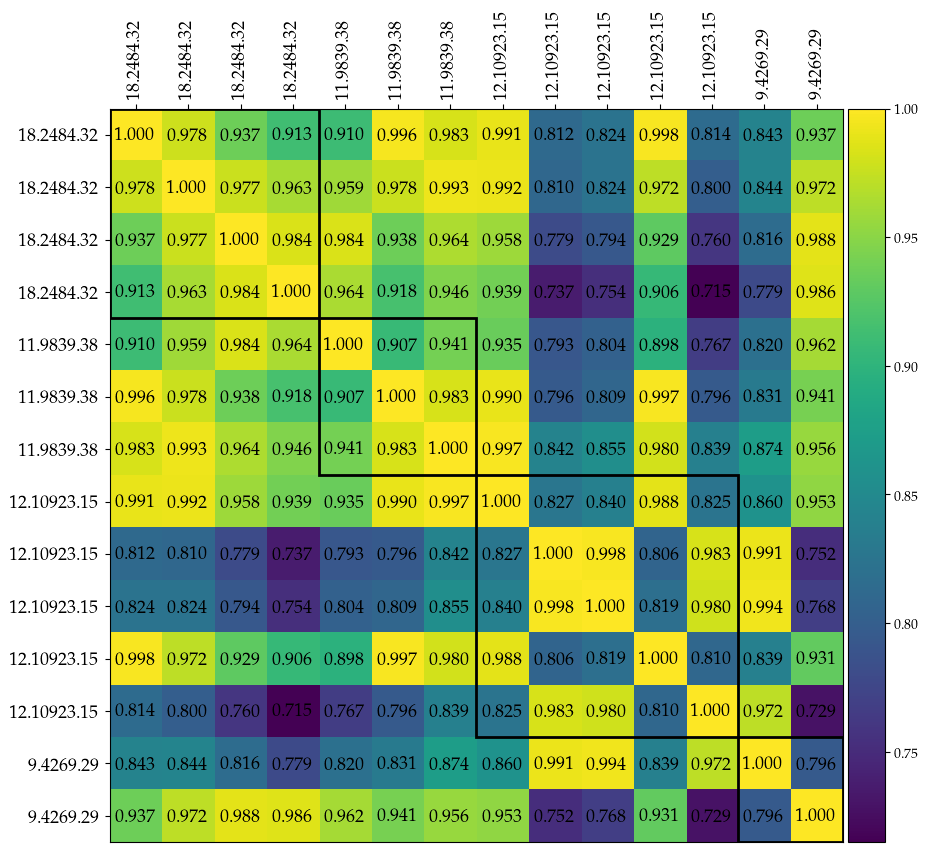

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

init_index=42
N = 14
cosim_matrix = cosine_similarity(avg_att[init_index:init_index+N], 
                                 avg_att[init_index:init_index+N])
roid = emb_dict['oid'][:N]
q = pd.DataFrame(roid, columns=['oid']).groupby('oid').size()

fig, axes = plt.subplots(1, 1, figsize = (10,10))

im = axes.imshow(cosim_matrix, interpolation='nearest', cmap='viridis')
axes.set_xticks(range(N))
axes.set_xticklabels(roid, rotation=90, fontsize=13)
axes.xaxis.tick_top()
axes.set_yticks(range(N))
axes.set_yticklabels(roid, fontsize=13)

n_windows = [q[l] for l in roid]
pivot = -.5
last = ''
for size, idd in zip(n_windows, roid):
    if last == idd: continue
    rect = patches.Rectangle((pivot, pivot), 
                             size, size, 
                             linewidth=2, 
                             edgecolor='k', 
                             facecolor='none')
    pivot+=size
    last = idd
   
    # Add the patch to the Axes
    axes.add_patch(rect)

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

for i, j in np.ndindex(N, N):
    
    axes.text(i-0.4, j+0.1, 
              '{:.3f}'.format(cosim_matrix[i][j]), fontsize=13)


plt.show()